In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import ensemble_project as ens

from sklearn.model_selection import train_test_split

from scipy.io import arff
import pandas as pd

In [3]:
data = arff.loadarff('C:/Users/Supervisor/Desktop/Kollektif Öğrenme/Proje/breast-cancer.arff')
df = pd.DataFrame(data[0])

df.head()

,age=20-29,age=30-39,age=40-49,age=50-59,age=60-69,age=70-79,menopause=lt40,menopause=ge40,menopause=premeno,tumor-size=0-4,...,deg-malig=2,deg-malig=3,breast,breast-quad=left_up,breast-quad=left_low,breast-quad=right_up,breast-quad=right_low,breast-quad=central,irradiat,a39+1
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,b'2'
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,b'1'
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,b'2'
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,b'1'
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,b'2'


In [4]:
X = df.drop(['a39+1'],axis=1)
y = df['a39+1']

In [5]:
y.groupby(y).count()

a39+1
b'1'    201
b'2'     85
Name: a39+1, dtype: int64

In [6]:
y = y.apply(lambda x : 1 if x==b'1' else 2)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [8]:
bagging_100vs10x10, eoe_bagging_100vs10x10, result_bagging_100vs10x10, ttest_bagging_vs_ens = ens.baggingClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_bagging_100vs10x10)
print(ttest_bagging_vs_ens)

   bagging_acc   ens_acc
0     0.741379  0.758621
          t         p
0 -0.353553  0.738093


In [9]:
ada_100vs10x10, eoe_ada_100vs10x10, result_ada_100vs10x10, ttest_ada_vs_ens = ens.adaBoostClassifier_100vs10x10(X_train, X_test, y_train, y_test)
print(result_ada_100vs10x10)
print(ttest_ada_vs_ens)

    ada_acc   ens_acc
0  0.741379  0.758621
          t         p
0  0.650027  0.544354


In [10]:
rs_100vs10x10, eoe_rs_100vs10x10, result_rs_100vs10x10, ttest_rs_vs_ens = ens.randomSubspaceClassifier_100vs10x10(X_train, X_test, y_train, y_test)
print(result_rs_100vs10x10)
print(ttest_rs_vs_ens)

   rnd_subspace_acc   ens_acc
0          0.706897  0.775862
          t         p
0  0.451754  0.670368


In [11]:
rf_100vs10x10, eoe_rf_100vs10x10, result_rf_100vs10x10, ttest_rf_vs_ens = ens.randomForestClassifier_100vs10x10(X_train, X_test, y_train, y_test)
print(result_rf_100vs10x10)
print(ttest_rf_vs_ens)

     rf_acc   ens_acc
0  0.758621  0.724138
         t         p
0 -0.83205  0.443292


In [12]:
extra_100vs10x10, eoe_extra_100vs10x10, result_extra_100vs10x10, ttest_extra_vs_ens = ens.extraTreesClassifier_100vs10x10(X_train, X_test, y_train, y_test)
print(result_extra_100vs10x10)
print(ttest_extra_vs_ens)

   extra_acc   ens_acc
0   0.775862  0.724138
          t         p
0  0.377964  0.720971


In [13]:
bagging_100vs10x100, eoe_bagging_100vs10x100, result_bagging_100vs10x100, ttest_bagging_vs_ens_100 = ens.baggingClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_bagging_100vs10x100)
print(ttest_bagging_vs_ens_100)

   bagging_acc   ens_acc
0     0.758621  0.775862
          t         p
0 -0.456435  0.667219


In [14]:
ada_100vs10x100, eoe_ada_100vs10x100, result_ada_100vs10x100, ttest_ada_vs_ens_100 = ens.adaBoostClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_ada_100vs10x100)
print(ttest_ada_vs_ens_100)

    ada_acc   ens_acc
0  0.741379  0.741379
    t   p
0 NaN NaN


In [15]:
rs_100vs10x100, eoe_rs_100vs10x100, result_rs_100vs10x100, ttest_rs_vs_ens_100 = ens.randomSubspaceClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_rs_100vs10x100)
print(ttest_rs_vs_ens_100)

   rnd_subspace_acc   ens_acc
0          0.706897  0.758621
          t         p
0  1.783765  0.134541


In [16]:
rf_100vs10x100, eoe_rf_100vs10x100, result_rf_100vs10x100, ttest_rf_vs_ens_100 = ens.randomForestClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_rf_100vs10x100)
print(ttest_rf_vs_ens_100)

     rf_acc   ens_acc
0  0.724138  0.758621
          t        p
0  0.934765  0.39282


In [17]:
extra_100vs10x100, eoe_extra_100vs10x100, result_extra_100vs10x100, ttest_extra_vs_ens_100 = ens.extraTreesClassifier_100vs10x100(X_train, X_test, y_train, y_test)
print(result_extra_100vs10x100)
print(ttest_extra_vs_ens_100)

   extra_acc   ens_acc
0   0.758621  0.741379
          t         p
0 -2.981424  0.030749


In [18]:
all_df = ens.single_vote_stack(X_train, X_test, y_train, y_test)

In [19]:
all_df

,0,1
0,Bagging,0.720690
1,Adaboost,0.758621
2,RS,0.753448
3,RF,0.741379
4,ExtraRandomTree,0.744828
5,Voting,0.720690
6,Stack_Bagging,0.689655
7,Stack_Adaboost,0.713793
8,Stack_RS,0.691379
9,Stack_RF,0.706897


In [20]:
import matplotlib.pyplot as plt

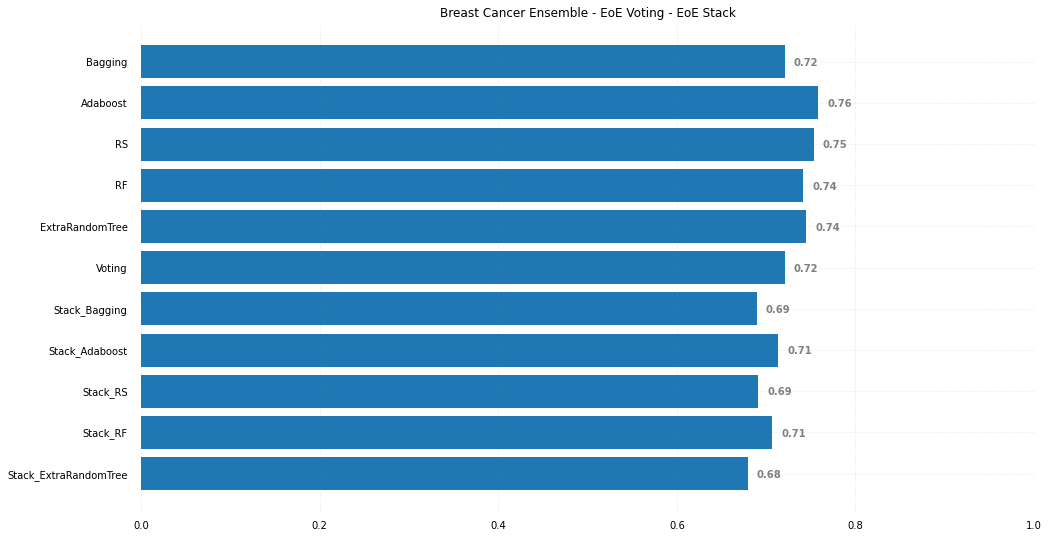

In [21]:
name = all_df[0]
acc = all_df[1]
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

ax.set_xlim(0,1)

# Horizontal Bar Plot
ax.barh(name, acc)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.01, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Breast Cancer Ensemble - EoE Voting - EoE Stack', loc ='center')
 

 
# Show Plot
plt.show()